
# Salary Prediction


## Goal: 
        To predict the salary of an individual based on location, education level, years of experience.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://github.com/RonnieCOOL/Salary-Prediction-Webapp/blob/main/survey_results_public.csv") # Reading the data from the csv file

In [2]:
df.head() # Printing first 5 data

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [3]:
# Cleaning the data
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [4]:
df = df[df["Salary"].notnull()] # Taking the datas whose salary is available
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [5]:
df.info() # Information about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [6]:
df = df.dropna() # Dropping the rows where one of those columns is not a number
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [7]:
# Keeping the data where user is employed full-time
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [8]:
df['Country'].value_counts() # Couting number of different countries

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [9]:
# Cleaning the countries which have very less data points
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [10]:
country_map = shorten_categories(df.Country.value_counts(), 500) # taking cutoff value as 500
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts() # printing the countries after cleaning the countries

Other                                                   9484
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Name: Country, dtype: int64

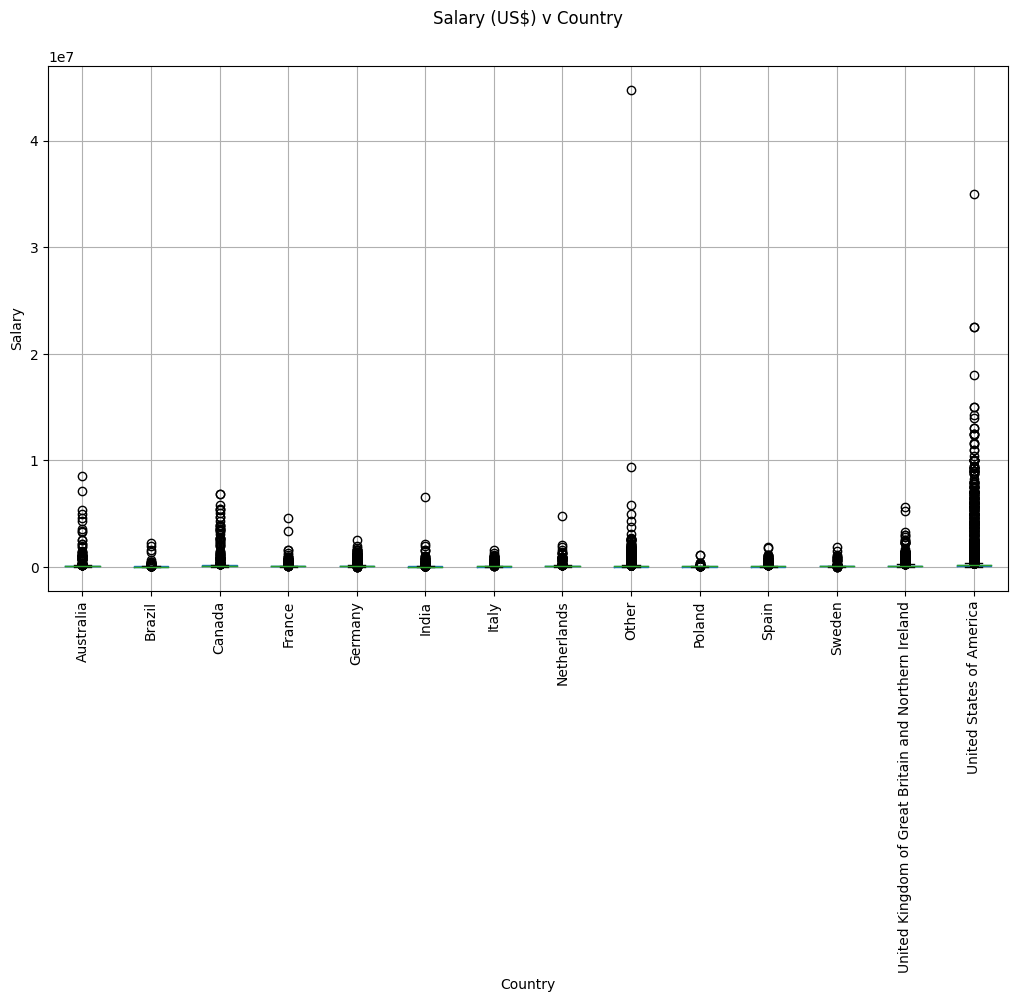

In [11]:
# Inspecting Salary vs Country (box-plot)
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df[df["Salary"] <= 400000] # since medians for every country is less than 400k dollars we took those salary values which are less than the 400k dollars
df = df[df["Salary"] >= 10000] # taking salaries which are greater than 10k dollars
df = df[df['Country'] != 'Other']  

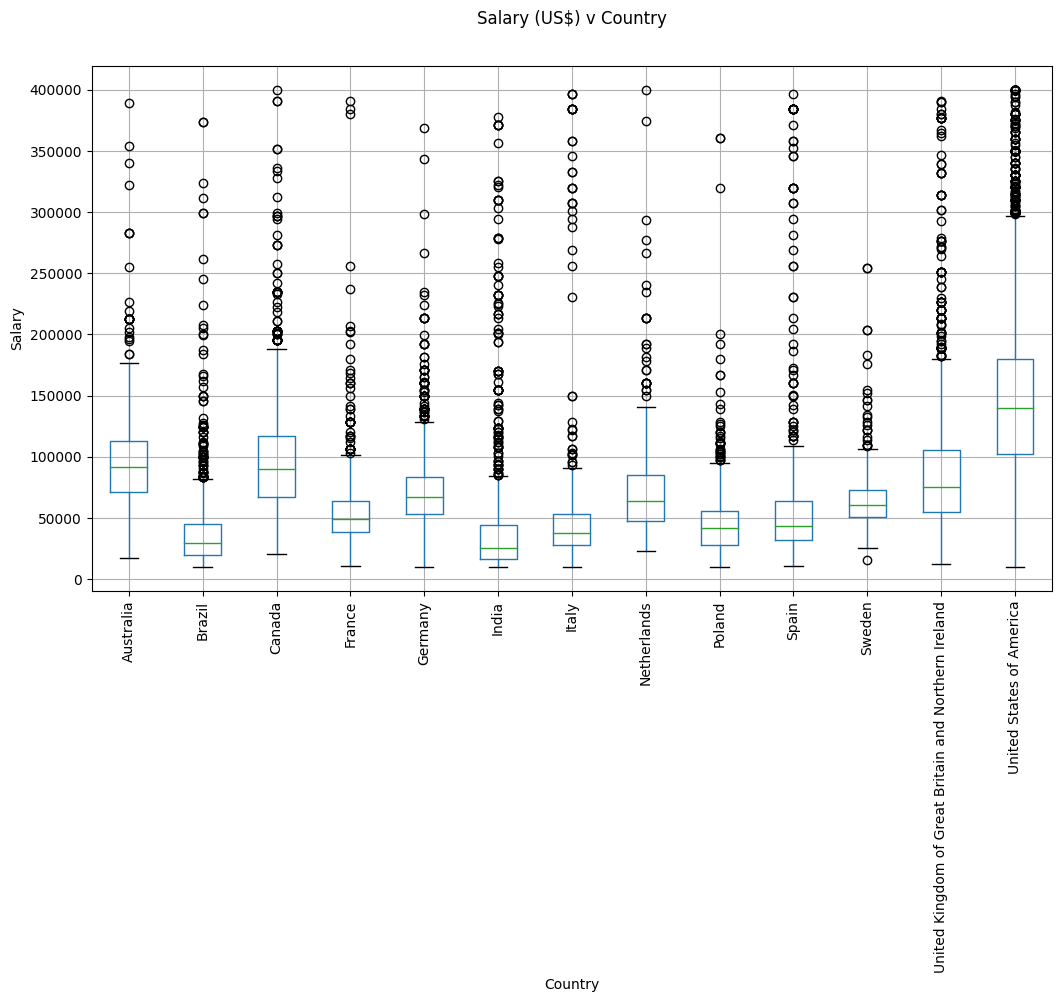

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df["YearsCodePro"].unique() # checking the distinct values in YearsCodePro

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23', '45',
       'Less than 1 year', '18', '37', '46', '22', '32', '40', '13', '27',
       '28', '16', '31', '26', '34', '35', '30', '42', '38', '36', '29',
       '41', '33', '39', '48', '44', '43', 'More than 50 years', '47',
       '49', '50'], dtype=object)

In [15]:
# cleaning the YearsCodePro
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [16]:
df["YearsCodePro"].unique() # printing the values after cleaning

array([ 5. ,  6. ,  2. ,  4. , 20. ,  9. , 14. , 21. , 15. , 25. ,  3. ,
       10. ,  8. , 12. ,  7. , 19. , 17. , 24. ,  1. , 11. , 23. , 45. ,
        0.5, 18. , 37. , 46. , 22. , 32. , 40. , 13. , 27. , 28. , 16. ,
       31. , 26. , 34. , 35. , 30. , 42. , 38. , 36. , 29. , 41. , 33. ,
       39. , 48. , 44. , 43. , 50. , 47. , 49. ])

In [17]:
df["EdLevel"].unique() # checking the distinct values in Educational Level

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [18]:
# cleaning the Educational Level
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [19]:
df["EdLevel"].unique() # printing the values after cleaning

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel']) #transforming the Education Level into numbers
df["EdLevel"].unique()
#le.classes_

array([2, 0, 1, 3])

In [21]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country']) #transforming the Countries into numbers
df["Country"].unique()

array([11,  7, 12,  6,  2,  4,  8,  3,  1, 10,  9,  5,  0])

In [22]:
X = df.drop("Salary", axis=1) # features for our model (Education Level, Country and Years of Experience)
y = df["Salary"] # Output

In [23]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression() # using Linear Regression model as there is huge amount of data
linear_reg.fit(X, y.values)

LinearRegression()

In [24]:
y_pred = linear_reg.predict(X) # predicting the values obtained from the model

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred)) # calculating the error from the model and the absolute values

In [26]:
print("Error from Linear Regression model: ${:,.02f}".format(error)) # The error is pretty high

Error from Linear Regression model: $58,566.09


In [27]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values) # using Decision Tree Regressor Model

DecisionTreeRegressor(random_state=0)

In [28]:
y_pred = dec_tree_reg.predict(X) # predicting the values obtained from the model

In [29]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("Error from Decision Tree Regressor model: ${:,.02f}".format(error)) # The error is less than the Linear Regression Model

Error from Decision Tree Regressor model: $48,358.11


In [30]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values) # fitting the data using Random Forest Regressor Model

RandomForestRegressor(random_state=0)

In [31]:
y_pred = random_forest_reg.predict(X) # predicting the values obtained from the model

In [32]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("Error from Random Forest Regressor model: ${:,.02f}".format(error)) # The error is more than the Decision Tree Regressor Model

Error from Random Forest Regressor model: $48,431.85


In [33]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values) # fitting the data using Grid Search Cross Validation Model

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [34]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X) # predicting the values obtained from the model
error = np.sqrt(mean_squared_error(y, y_pred))
print("Error from GridSearchCV model: ${:,.02f}".format(error)) # The error is less from the Decision Tree Regressor Model

Error from GridSearchCV model: $49,894.57


In [35]:
X # looking the dataframe

,Country,EdLevel,YearsCodePro
2,11,2,5.0
8,7,2,6.0
10,11,0,2.0
12,12,0,5.0
21,6,2,4.0
...,...,...,...
73113,12,2,5.0
73116,12,0,16.0
73119,12,0,1.0
73120,9,0,2.0


In [36]:
# country, edlevel, yearscode
X = np.array([["India", 'Master’s degree', 15 ]])
X

array([['India', 'Master’s degree', '15']], dtype='<U15')

In [37]:
# fitting the input data with the model
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[ 5.,  2., 15.]])

In [38]:
y_pred = regressor.predict(X) # predicting the output for the given input data with our model
y_pred

C:\Users\Ankan\Desktop\mlapp\deploy-lr-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([63125.3943662])

In [39]:
import pickle # saving the data to use it in our app

In [40]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file) # reading data in write binary mode

In [41]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file) # displaying data in read binary mode

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [42]:
y_pred = regressor_loaded.predict(X)
y_pred # predicting the output for the given input data with our model

C:\Users\Ankan\Desktop\mlapp\deploy-lr-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([63125.3943662])